In [29]:
import numpy as np
import matplotlib.pyplot as plt

---

In [30]:
def plasmaFunc(arg, intervals_eps = 1e-3):
    import numpy as np
    
    sign = np.sign(arg)
    abs_arg = np.abs(arg)
    
    def func(x, singularity):
        if x == singularity:
            return 2 * singularity * np.e**(-singularity**2)
        else:
            return (np.e**(-x**2) - np.e**(-singularity**2)) / (x - singularity)
    
    if abs_arg > np.e:
        b = np.sqrt(np.log(1 / intervals_eps))
        a = -np.sqrt(np.log(1 / intervals_eps))
        n = 2**(np.log10(1 / intervals_eps))
    else:
        b = 1 / intervals_eps
        a = -1 / intervals_eps
        n = np.e / intervals_eps

    step = (b - a) / n
    points = np.arange(a + step / 2, b, step)
    I = step * np.sum([func(point, abs_arg) for point in points])
    
    return sign * I / (np.sqrt(np.pi))

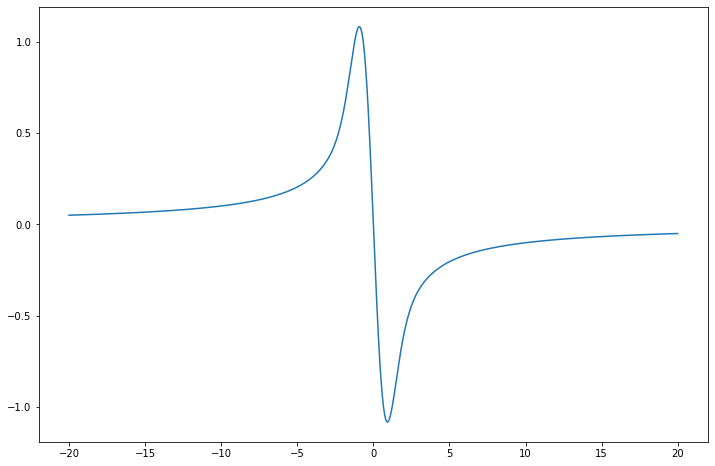

In [31]:
xlin = np.linspace(-20, 20, 1000)
y = [plasmaFunc(i) for i in xlin]

plt.figure(figsize=(12,8))
plt.plot(xlin, y)
plt.show()

---

To evaluate the accuracy of the composed function Newton's iteration method will be used:

In [32]:
def newton_iteration(f, x0, args = [], alpha = 1, eps=1e-5, maxiter=1000):
    x_n = x0
    temp = x0
    i = 0
    while i == 0 or ((i < maxiter) & (abs(x_n - temp) >= eps)):
        deriv = (f(x_n + eps, *args) - f(x_n, *args)) / eps
        temp = x_n
        if deriv == 0:
            raise ValueError("The derivative equals zero at the point x = %s, change the starting point! The number of iterations: %i" % (x_n, i))
        
        x_n  -= alpha * f(x_n, *args) / deriv
        i += 1
        
    return x_n, i

---

Using an approximation of $a \to 0$ to evaluate the accuracy of computations:

In [33]:
a = 1e-12
b = 3 * 1e-1 # (omega_pe)^2 / (kc)^2
c = 14 * 1e-5 # |omega_ce| / (kc)

equation = lambda N: N**2 * (1 - b * plasmaFunc((1 - N * c) / (N * a)) / (N * a)) - 1 # = 0, full equation
approximation = (1 + b) / c

In [34]:
extremum = newton_iteration(equation, approximation)
delta = np.abs(extremum[0] - approximation)

print('Real extremum: ', extremum[0], '\nApproximation: ', approximation)

xlin = np.linspace(approximation - 2 * delta, approximation + 2 * delta, 1000)
ylin = [equation(i) for i in xlin]

Real extremum:  9285.457289947464 
Approximation:  9285.714285714284


---

Using an approximation of $a \to \infty$ to evaluate the accuracy of computations:

In [155]:
a = 1e12
b = 3 * 1e-1 # (omega_pe)^2 / (kc)^2
c = 14 * 1e-5 # |omega_ce| / (kc)

equation = lambda N: N**2 * (1 - b * plasmaFunc((1 - N * c) / (N * a)) / (N * a)) - 1 # = 0, full equation
approximation = 1

In [156]:
extremum = newton_iteration(equation, approximation)
delta = np.abs(extremum[0] - approximation)

print('Real extremum: ', extremum[0], '\nApproximation: ', approximation)

xlin = np.linspace(approximation - 2 * delta, approximation + 2 * delta, 1000)
ylin = [equation(i) for i in xlin]

Real extremum:  1.0 
Approximation:  1


---

An equation for a derivative of the plasma function: $Z'(\xi)=-2(1 + \xi Z(\xi))$
The accuracy can be evaluated by finding the extremum of plasma function using the formula and usual computation method:

In [157]:
eps = 1e-4

plasmaFuncDer = lambda x: -2 * (1 + x * plasmaFunc(x, eps))

extremum = newton_iteration(plasmaFuncDer, 1, eps=eps)
xlin = np.linspace(0, 30, int(1 / eps))
ylin = [plasmaFunc(i, eps) for i in xlin]
approximation = xlin[np.argmin(ylin)]

print('Formula:       ', extremum[0], '\nApproximation: ', approximation)

Formula:        0.9241740419960427 
Approximation:  0.9240924092409241
